Introduction: https://www.alleghenycounty.us/uploadedFiles/Allegheny_Home/Health_Department/Resources/Data_and_Reporting/Air_Quality_Reports/2021_AQ_Annual_Review.pdf
<br/><br/> The best air quality will be used to help determine the safest neighbourhood in Pittsburgh. 

Air quality is determined by the amount of possibly dangerous chemicals and/or pollutants found in each measured region of Pittsburgh. The sensors are located in each township of
Alleghany county.

Air pollution is caused by human activity that creates harmful chemicals for humans to breathe. Whether it be industry, open burning (outdoor grilling, bonfires, etc), 
high-motor-traffic areas. Regions will be judged based on how much these activities and operations effect the air quality. Air quality can also be changed by the 
amount of air circulation each region has, this would be affected by population density (large buildings, clusters).

The effects of poor air quality can be severe, it can lead to irritation of the sensitive areas(throat, nose, eyes, lungs); it can lead to cardiovascular and respitory illnessess:
asthma, heart disease, and emphysema; and in severe cases even cancer: lung cancer, liver cancer.


**Data:** https://www.alleghenycounty.us/uploadedFiles/Allegheny_Home/Health_Department/Resources/Data_and_Reporting/Air_Quality_Reports/2021-data-summary.pdf <br/><br/>
The monitor results below show the concentration of PM2.5 (particle matter above 2.5 micro meters) within the air of each region.

**PM2.5 By Town in Alleghany County**

In [4]:
#importing pandas
import pandas as pd
#reading csv w/ pandas .read_csv
air_df = pd.read_csv("https://data.wprdc.org/datastore/dump/4ab1e23f-3262-4bd3-adbf-f72f0119108b")#imports
#creating columns and assigning values 
cols = [i for i in list(air_df.columns) if i not in ["site", "index_value"]]
air_df = air_df.drop(columns = cols, axis = 1)
air_df
#create dictionary for air quality index value
air_dict = {}
#loops through data set (daily measurements), keeps count of each county's avg PPM2.5 over each day
for index, row in air_df.iterrows():
    if row["site"] in air_dict:
        air_dict[row["site"]] = [air_dict[row["site"]][0] + 1, (air_dict[row["site"]][1] + float(row["index_value"]))]
    else:
        air_dict[row["site"]] = [1, float(row["index_value"])]
        
for item in air_dict.keys():
    val = (air_dict[item][1]/air_dict[item][0])
    air_dict[item] = val
        
print(air_dict)

{'Lawrenceville': 37.663634187215706, 'Flag Plaza': 9.94927536231884, 'Harrison Township': 24.210454189506656, 'Avalon': 22.646443016892697, 'Lincoln': 35.10800223838836, 'South Fayette': 21.777940560904145, 'North Braddock': 18.32499213094114, 'Parkway East': 21.88936654444304, 'Liberty 2': 32.15130568356375, 'Lawrenceville 2': 3.060887708649469, 'Glassport High Street': 17.066969353007945, 'Liberty': 18.74294316898758, 'Clairton': 21.35561877667141, 'West Mifflin': 6.335548172757475, 'Pittsburgh': 26.210040983606557}


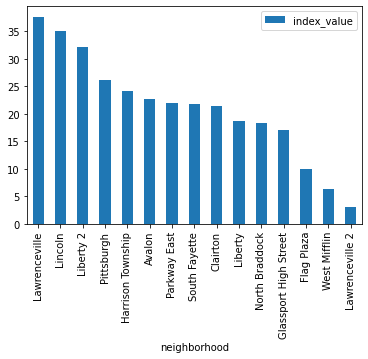

In [8]:
neighborhood_air_df = pd.DataFrame(list(air_dict.items()), columns = ['neighborhood', 'index_value'])
neighborhood_air_df.sort_values("index_value", ascending = False, inplace = True)
neighborhood_air_df.plot.bar(x = "neighborhood", y = "index_value")


In [10]:
highest = neighborhood_air_df['neighborhood'].iloc[0]
highestnumber = neighborhood_air_df['index_value'].iloc[0]
print("The neighborhood with the highest air quality is", highest, "with", highestnumber, "PPM2.5")

The neighborhood with the highest air quality is Lawrenceville with 37.663634187215706 PPM2.5
